# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as ohe
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


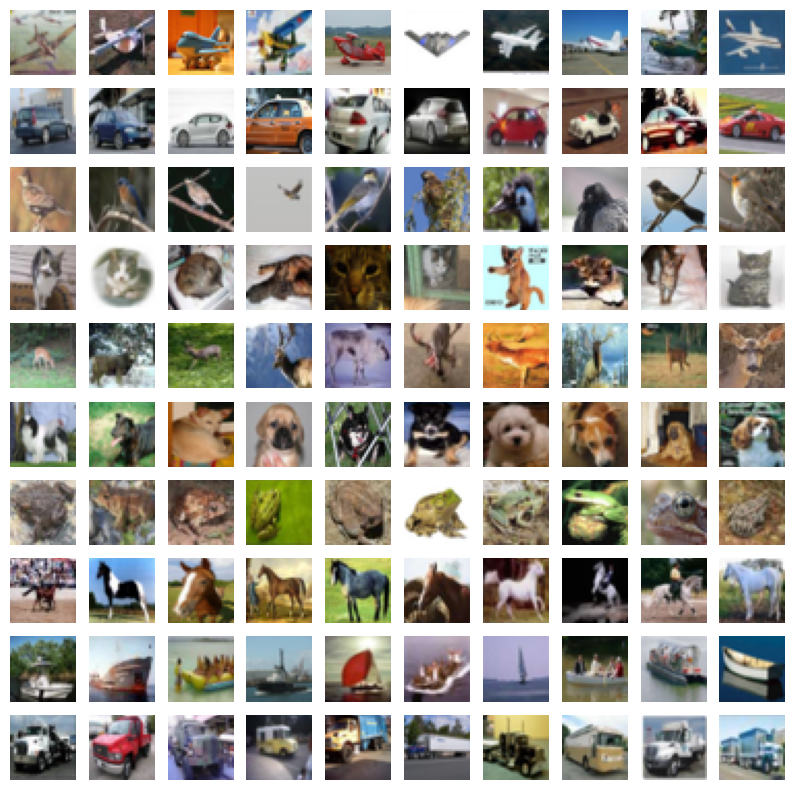

In [7]:
# Your code here :
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]
num_class=10
fig, axes=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  class_indices = np.where(y_train.flatten() == i)[0]
  random_indices = np.random.choice(class_indices, num_class, replace=False)
  for j, idx in enumerate(random_indices):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis('off')

plt.show()
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [5]:
print(f"Original label: {y_train[0]}")
print(f"One-hot encoded label: {y_train_one_hot[0]}")

Original label: [6]
One-hot encoded label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Your code here :
batch_size = 512
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.1560 - loss: 2.2834 - val_accuracy: 0.2268 - val_loss: 2.1993
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2491 - loss: 2.1649 - val_accuracy: 0.2646 - val_loss: 2.0777
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2877 - loss: 2.0462 - val_accuracy: 0.2928 - val_loss: 2.0008
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3097 - loss: 1.9727 - val_accuracy: 0.3136 - val_loss: 1.9492
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3318 - loss: 1.9321 - val_accuracy: 0.3344 - val_loss: 1.9147
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3416 - loss: 1.8985 - val_accuracy: 0.3402 - val_loss: 1.8859
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3547 - loss: 1.8649 - val_accuracy: 0.3546 - val_loss: 1.8621
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3645 - loss: 1.8432 - val_accuracy: 0.3462 - v

*   Plot the cross entropy loss curve and the accuracy curve

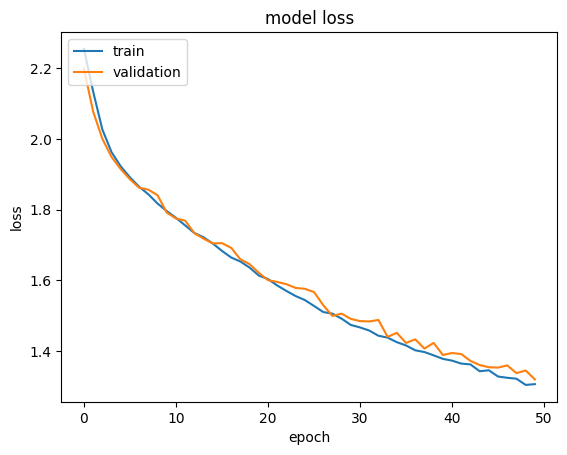

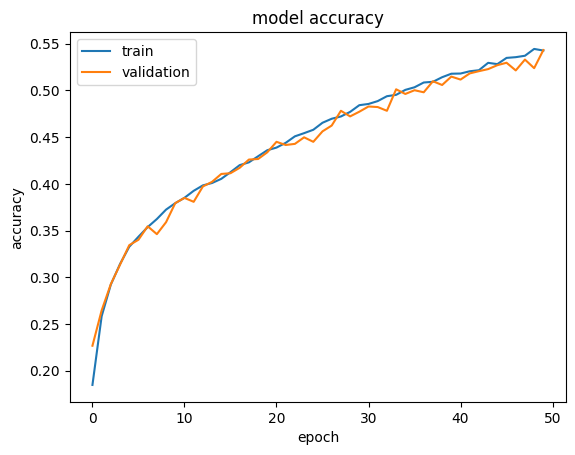

In [8]:
# Your code here :
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
VGG_ART=Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,008 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
batch_size = 512
epochs = 50

VGG_ART.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history=VGG_ART.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.1464 - loss: 2.2733 - val_accuracy: 0.2474 - val_loss: 2.1434
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2660 - loss: 2.0937 - val_accuracy: 0.2592 - val_loss: 2.0502
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2922 - loss: 2.0030 - val_accuracy: 0.3300 - val_loss: 1.9204
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3310 - loss: 1.9186 - val_accuracy: 0.3410 - val_loss: 1.8721
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3529 - loss: 1.8498 - val_accuracy: 0.3418 - val_loss: 1.8847
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3655 - loss: 1.8171 - val_accuracy: 0.3730 - val_loss: 1.7803
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3831 - loss: 1.7697 - val_accuracy: 0.3908 - val_loss: 1.7436
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3869 - loss: 1.7398 - val_accuracy: 0.4080 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


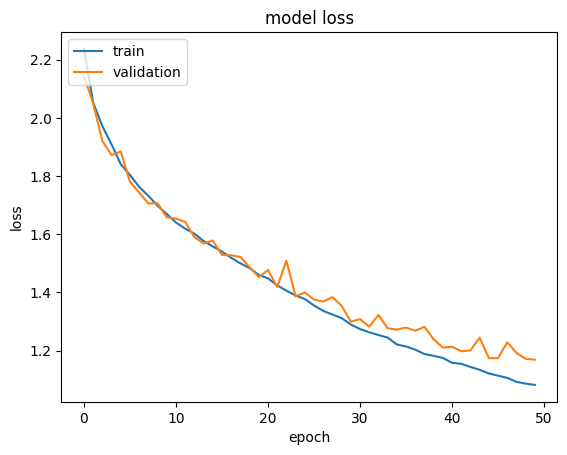

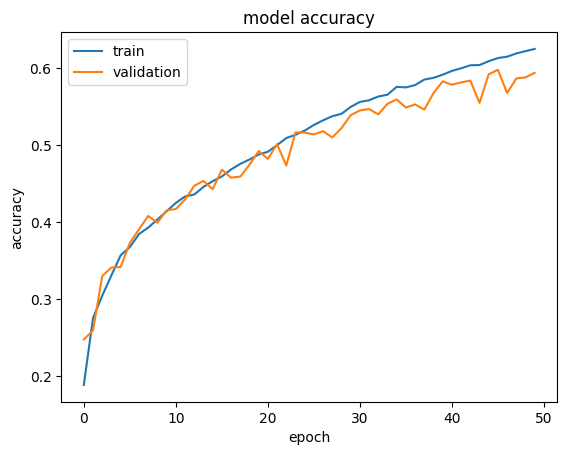

In [12]:
# Your code here :
import matplotlib.pyplot as plt
plt.plot(VGG_ART.history.history['loss'])
plt.plot(VGG_ART.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(VGG_ART.history.history['accuracy'])
plt.plot(VGG_ART.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Comment on the observation**

*(the socand model was more stapel and give a better perfomanc )*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


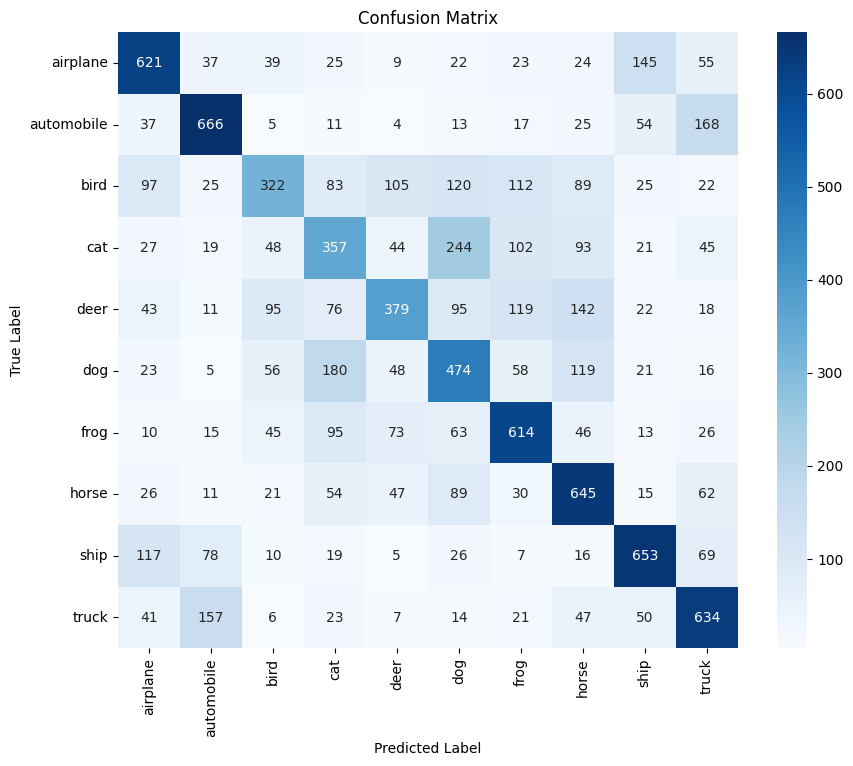

In [13]:
# Your code here :
y_pred_probabilities = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(the model work good only with som catogry like truck and work bad with othor like cat,dog)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5368 - loss: 1.3207
Test accuracy: 0.5364999771118164


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [1]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :
import cv2
x_train_resized = np.array([cv2.resize(img, (64, 64)) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (64, 64)) for img in x_test])
x_train_resized = x_train_resized.astype("float32") / 255.0
x_test_resized = x_test_resized.astype("float32") / 255.0
model = Sequential([

    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [8]:
# Your code here :
model.compile(
    loss="categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"]
)
history = model.fit(
    x_train_resized, y_train_one_hot,
    validation_data=(x_test_resized, y_test_one_hot),
    epochs=10,
    batch_size=512
)
y_pred_probabilities = model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 845ms/step - accuracy: 0.0982 - loss: 2.2979 - val_accuracy: 0.1023 - val_loss: 2.2836
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 383ms/step - accuracy: 0.1117 - loss: 2.2741 - val_accuracy: 0.1956 - val_loss: 2.2135
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.2082 - loss: 2.1749 - val_accuracy: 0.2653 - val_loss: 2.0750
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 385ms/step - accuracy: 0.2541 - loss: 2.0873 - val_accuracy: 0.2765 - val_loss: 2.0203
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 382ms/step - accuracy: 0.2800 - loss: 2.0250 - val_accuracy: 0.2877 - val_loss: 2.0800
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.3144 - loss: 1.9525 - val_accuracy: 0.3633 - val_loss: 1.8321
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.3414 - loss: 1.8796 - val_accuracy: 0.3686 - val_loss: 1.7907
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.3615 - loss: 1.8220 - val_acc

NameError: name 'confusion_matrix' is not defined

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
